In [106]:
import pandas as pd
import numpy as np
from scipy.signal import argrelextrema
import matplotlib.pyplot as plt

In [107]:
experiment_time_ms = 19000

In [128]:
df = pd.read_csv('rawdata/1645703267/pulseLN2.csv', header=None, names=["value"])
df

,value
0,317
1,312
2,306
3,307
4,310
...,...
1710,324
1711,324
1712,322
1713,323


In [129]:
original_count = len(df['value'])
original_count

1715

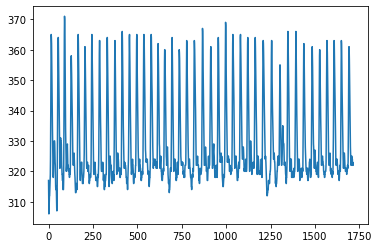

In [130]:
ax = plt.gca()
plt.plot(df.index, df['value'])

In [131]:
# remove small values
df = df.drop(df[df.value < 330].index)

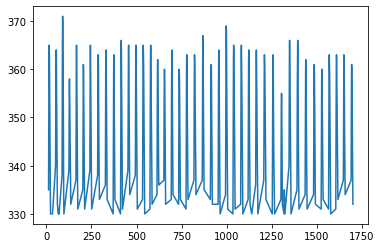

In [132]:
plt.plot(df.index, df['value'])

In [133]:
# number of points to be checked before and after
n = 5 
df['max'] = df.iloc[argrelextrema(df.value.values, np.greater_equal, order=n)[0]]['value']

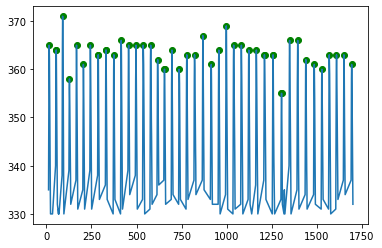

In [134]:
plt.scatter(df.index, df['max'], c='g')
plt.plot(df.index, df['value'])

In [135]:
df = df.dropna()

In [136]:
peaks_count = len(df['max'])
peaks_count

48

In [137]:
# miliseconds
HRV = experiment_time_ms / peaks_count
HRV

395.8333333333333